# Automated Food Identification and Calorie Calculation Using Deep Learning

Importing Dataset

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing libraries

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

Data Preprocessing

Training Image Preprocessing

In [11]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fooddata/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


Validation Image Preprocessing

In [12]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fooddata/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


Building Model

In [13]:
cnn = tf.keras.models.Sequential()

Building Convolutional Layers

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [18]:
cnn.add(tf.keras.layers.Flatten())

In [19]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [20]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [21]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [22]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

Compiling and Training the Model

In [23]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                      

In [25]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 538s 5s/step - loss: 6.8861 - accuracy: 0.0356 - val_loss: 3.4081 - val_accuracy: 0.0570
Epoch 2/32
98/98 [==============================] - 149s 1s/step - loss: 3.3748 - accuracy: 0.0742 - val_loss: 3.1925 - val_accuracy: 0.1339
Epoch 3/32
98/98 [==============================] - 151s 1s/step - loss: 3.1339 - accuracy: 0.1143 - val_loss: 2.8594 - val_accuracy: 0.2792
Epoch 4/32
98/98 [==============================] - 146s 1s/step - loss: 2.9262 - accuracy: 0.1589 - val_loss: 2.4677 - val_accuracy: 0.4444
Epoch 5/32
98/98 [==============================] - 137s 1s/step - loss: 2.6657 - accuracy: 0.2199 - val_loss: 1.8797 - val_accuracy: 0.6296
Epoch 6/32
98/98 [==============================] - 139s 1s/step - loss: 2.3934 - accuracy: 0.3037 - val_loss: 1.4609 - val_accuracy: 0.7009
Epoch 7/32
98/98 [==============================] - 137s 1s/step - loss: 2.0915 - accuracy: 0.3900 - val_loss: 1.2875 - val_accuracy: 0.8120
Epoch 8/32
98

Evaluating Model

In [26]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 84s 801ms/step - loss: 0.0804 - accuracy: 0.9798
Training accuracy: 0.9797753095626831


In [27]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 13s 235ms/step - loss: 0.3489 - accuracy: 0.9516
Validation accuracy: 0.9515669345855713


Saving Model

In [28]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
training_history.history #Return Dictionary of history

{'loss': [6.886102199554443,
  3.37477707862854,
  3.1339242458343506,
  2.9261598587036133,
  2.6656830310821533,
  2.3933982849121094,
  2.091472625732422,
  1.8283478021621704,
  1.5222465991973877,
  1.2782052755355835,
  1.0854119062423706,
  0.8667666912078857,
  0.7265530824661255,
  0.6956471800804138,
  0.557837963104248,
  0.5115920305252075,
  0.42981505393981934,
  0.40679922699928284,
  0.385475754737854,
  0.34933701157569885,
  0.2931869626045227,
  0.2914848327636719,
  0.34884437918663025,
  0.29104578495025635,
  0.2581115961074829,
  0.23620395362377167,
  0.25920698046684265,
  0.2682429254055023,
  0.1855706423521042,
  0.1856556385755539,
  0.17033155262470245,
  0.1948266625404358],
 'accuracy': [0.035634029656648636,
  0.07415730506181717,
  0.11428571492433548,
  0.15890850126743317,
  0.21990369260311127,
  0.3036918044090271,
  0.39004814624786377,
  0.45906901359558105,
  0.544462263584137,
  0.6237559914588928,
  0.6837881207466125,
  0.7338683605194092,
  

In [30]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [31]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Calculating Accuracy of the model achieved on Validation Set

In [32]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 95.15669345855713 %


Accuracy Visualization

Training Visualization

In [33]:
#training_history.history['accuracy']

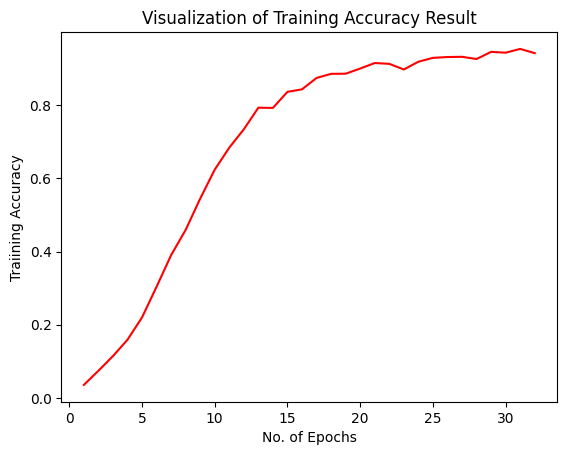

In [34]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

Validation Accuracy

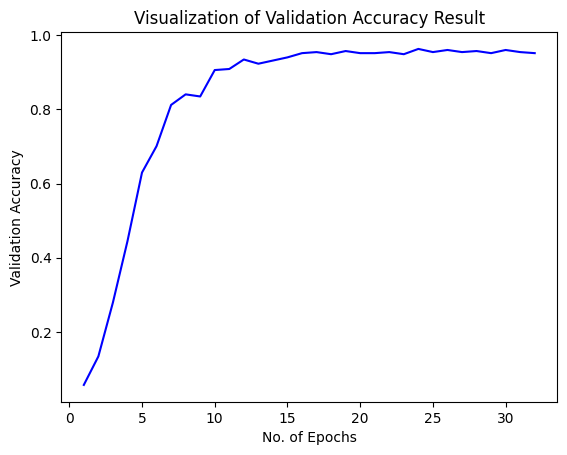

In [35]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

Test set Evaluation

In [36]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fooddata/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [37]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 44s 807ms/step - loss: 0.3423 - accuracy: 0.9526
Test accuracy: 0.9526462554931641


Importing Libraries

In [38]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

Test set Image Processing

In [39]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fooddata/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


Loading Model

In [40]:
cnn = tf.keras.models.load_model('/content/trained_model.h5')

Visualising and Performing Prediction on Single image

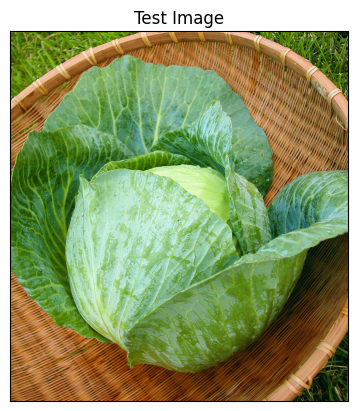

In [41]:
#Test Image Visualization 1
import cv2
image_path = '/content/drive/MyDrive/fooddata/test/cabbage/Image_1.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

Testing Model

In [42]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 270ms/step


In [43]:
print(predictions)

[[7.83278779e-07 3.47321783e-03 2.87845126e-07 1.18343514e-05
  9.66266215e-01 3.28077876e-04 3.24646265e-07 4.68968041e-03
  1.97274188e-04 5.07680175e-04 3.34937475e-04 7.54245639e-06
  1.80913066e-05 1.83001180e-06 1.12445894e-04 1.08759128e-03
  1.08898664e-02 1.07752794e-05 7.20955431e-05 7.63156544e-03
  9.23969026e-07 4.41949851e-07 1.11312083e-07 1.34178290e-05
  1.85179728e-04 1.23332182e-04 3.11491499e-06 1.27899327e-07
  2.44499688e-06 9.89798107e-04 2.44664145e-04 2.25261203e-03
  2.09202980e-07 1.17918273e-06 1.89738955e-06 5.38543041e-04]]


In [44]:
# test_set.class_names
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

4


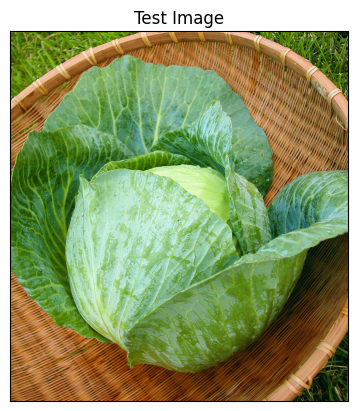

In [45]:
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [46]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a cabbage


Calorie Estimation

1/1 [==============================] - 0s 110ms/step


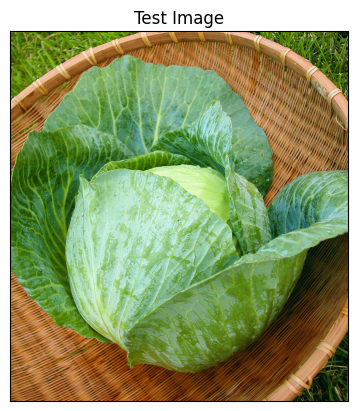

Estimated Calories:  0.004933697


In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load your trained calorie estimation model
cnn = tf.keras.models.load_model('/content/trained_model.h5')

# Path to your test image
image_path = '/content/drive/MyDrive/fooddata/test/cabbage/Image_1.jpg'

# Reading and processing the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
img_resized = cv2.resize(img, (64, 64))     # Resize image to match model input size
img_array = tf.keras.preprocessing.image.img_to_array(img_resized)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Normalize the image array if required (depending on your model's training process)
img_array = img_array / 255.0

# Predict the calorie content
predicted_calories = cnn.predict(img_array)

# Display the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Print predicted calorie content
print("Estimated Calories: ", predicted_calories[0][0])

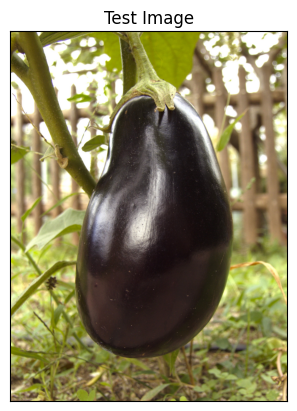

In [47]:
#Test Image Visualization 2
import cv2
image_path = '/content/drive/MyDrive/fooddata/test/eggplant/Image_1.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [48]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 29ms/step


In [49]:
print(predictions)

[[2.9498376e-11 1.7028668e-08 3.9218279e-10 1.1320817e-09 4.9012363e-09
  2.9824318e-10 3.4498576e-13 1.0481993e-09 1.0551713e-10 2.6995815e-07
  4.9105484e-08 9.9999344e-01 2.3190594e-06 2.7919597e-08 1.7070889e-07
  9.4044783e-10 6.4882633e-10 6.4697332e-08 6.1779595e-09 1.7562827e-07
  1.6025431e-10 2.0582006e-10 1.1619350e-11 3.4424207e-11 1.1890892e-09
  3.7555669e-08 4.9706052e-11 2.6078382e-12 2.3111638e-10 3.2210373e-06
  3.1855650e-11 2.4091381e-07 1.0939358e-11 2.4503581e-14 5.7531260e-08
  1.4410391e-09]]


In [50]:
# test_set.class_names
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

11


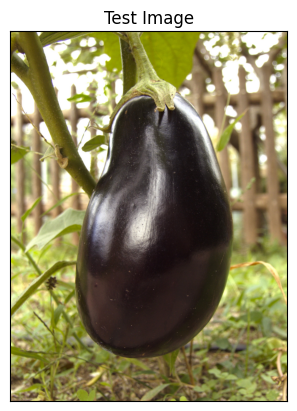

In [51]:
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [52]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a eggplant


Calorie Estimation

1/1 [==============================] - 0s 106ms/step


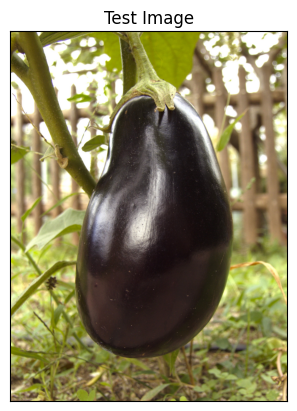

Estimated Calories:  0.00514253


In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load your trained calorie estimation model
cnn = tf.keras.models.load_model('/content/trained_model.h5')

# Path to your test image
image_path = '/content/drive/MyDrive/fooddata/test/eggplant/Image_1.jpg'

# Reading and processing the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
img_resized = cv2.resize(img, (64, 64))     # Resize image to match model input size
img_array = tf.keras.preprocessing.image.img_to_array(img_resized)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Normalize the image array if required (depending on your model's training process)
img_array = img_array / 255.0

# Predict the calorie content
predicted_calories = cnn.predict(img_array)

# Display the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Print predicted calorie content
print("Estimated Calories: ", predicted_calories[0][0])
